# EDA

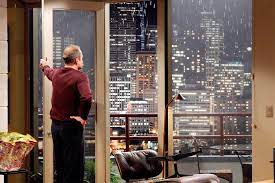

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
# Import dataframe
df = pd.read_csv('/Users/surajsharma/Desktop/AIPM_Bootcamp/ds-eda-project-template/eda.csv', sep=',')
df.head()
# We're keeping df as our main/fallback DataFrame

,id,house_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15
0,1,7129300520,2014-10-13,221900.000,3.000,1.000,1180.000,5650.000,NaN,3,7,1955,0.000,98178,1340.000
1,2,6414100192,2014-12-09,538000.000,3.000,2.250,2570.000,7242.000,0.000,3,7,1951,19910.000,98125,1690.000
2,3,5631500400,2015-02-25,180000.000,2.000,1.000,770.000,10000.000,0.000,3,6,1933,NaN,98028,2720.000
3,4,2487200875,2014-12-09,604000.000,4.000,3.000,1960.000,5000.000,0.000,5,7,1965,0.000,98136,1360.000
4,5,1954400510,2015-02-18,510000.000,3.000,2.000,1680.000,8080.000,0.000,3,8,1987,0.000,98074,1800.000


In [7]:
# Fixing date column
df['date'] = pd.to_datetime(df['date'])

### Creating new DataFrame (waterfront only 0) ###

In [14]:
df1 = df[df['waterfront'] == 0]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19060 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19060 non-null  int64         
 1   house_id       19060 non-null  int64         
 2   date           19060 non-null  datetime64[ns]
 3   price          19060 non-null  float64       
 4   bedrooms       19060 non-null  float64       
 5   bathrooms      19060 non-null  float64       
 6   sqft_living    19060 non-null  float64       
 7   sqft_lot       19060 non-null  float64       
 8   waterfront     19060 non-null  float64       
 9   condition      19060 non-null  int64         
 10  grade          19060 non-null  int64         
 11  yr_built       19060 non-null  int64         
 12  yr_renovated   15671 non-null  float64       
 13  zipcode        19060 non-null  int64         
 14  sqft_living15  19060 non-null  float64       
dtypes: datetime64[ns](1), fl

In [16]:
# Quick glance at size, types & missingness
print("Shape:", df1.shape)
df1.info()

# Basic descriptive stats (useful for slides)
display(df1.describe(include='all').T)

# % missing per column (sorted)
(df1.isna().mean() * 100).sort_values(ascending=False)


Shape: (19060, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 19060 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19060 non-null  int64         
 1   house_id       19060 non-null  int64         
 2   date           19060 non-null  datetime64[ns]
 3   price          19060 non-null  float64       
 4   bedrooms       19060 non-null  float64       
 5   bathrooms      19060 non-null  float64       
 6   sqft_living    19060 non-null  float64       
 7   sqft_lot       19060 non-null  float64       
 8   waterfront     19060 non-null  float64       
 9   condition      19060 non-null  int64         
 10  grade          19060 non-null  int64         
 11  yr_built       19060 non-null  int64         
 12  yr_renovated   15671 non-null  float64       
 13  zipcode        19060 non-null  int64         
 14  sqft_living15  19060 non-null  float64       
dtypes: da

,count,mean,min,25%,50%,75%,max,std
id,19060.000,10817.086,2.000,5431.750,10836.500,16193.250,21597.000,6220.303
house_id,19060.000,4594695538.188,1200021.000,2124079072.250,3905081665.000,7334500882.500,9900000190.000,2877507911.085
date,19060,2014-10-29 02:59:26.002098688,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,19060.000,532771.208,78000.000,320000.000,450000.000,639000.000,7700000.000,344918.550
bedrooms,19060.000,3.375,1.000,3.000,3.000,4.000,33.000,0.927
bathrooms,19060.000,2.113,0.500,1.750,2.250,2.500,8.000,0.764
sqft_living,19060.000,2073.750,370.000,1420.000,1910.000,2540.000,13540.000,909.227
sqft_lot,19060.000,15007.503,520.000,5033.500,7588.500,10588.000,1651359.000,40814.255
waterfront,19060.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
condition,19060.000,3.409,1.000,3.000,3.000,4.000,5.000,0.649


yr_renovated    17.781
id               0.000
house_id         0.000
date             0.000
price            0.000
bedrooms         0.000
bathrooms        0.000
sqft_living      0.000
sqft_lot         0.000
waterfront       0.000
condition        0.000
grade            0.000
yr_built         0.000
zipcode          0.000
sqft_living15    0.000
dtype: float64

**Reasons for keeping yr_renovated column**
- Unlimited budget: Jacob can gut‑renovate anything he buys; reno status might not matter.
- More inventory: dropping 18 % of rows might hide great lots or locations.

In [17]:
# Client wants bathrooms ≥ 4 OR (smaller neighbours)
df1['small_neighbors_flag'] = df1['sqft_living15'] < df1['sqft_living']
df1['small_neighbors_flag'].mean()  # just to see the share that qualifies


np.float64(0.45587618048268624)

In [53]:
# Building OR filter
jacob_bath_or_small = (df1['bathrooms'] >= 4) | (df1['small_neighbors_flag'])

cand_step1 = df1[jacob_bath_or_small].copy()
print("Rows after bath‑OR‑small filter:", cand_step1.shape)


Rows after bath‑OR‑small filter: (8723, 16)


**Bathrooms vs Smaller house neighbors**
- 45.6 % of listings have smaller neighbours (so Jacob would tolerate fewer baths).
- After applying “4 + baths OR smaller‑neighbours” we still have 8 723 homes to play with – plenty of inventory.

In [54]:
# Identifying the cut-off year for historic vs new house
cand_step1['decade'] = (cand_step1['yr_built'] // 10) * 10

decade_tbl = (
    cand_step1.groupby('decade')
              .agg(n_listings=('id', 'count'))
              .reset_index()
              .sort_values('decade')
)

decade_tbl


,decade,n_listings
0,1900,268
1,1910,330
2,1920,505
3,1930,213
4,1940,577
5,1950,888
6,1960,1041
7,1970,936
8,1980,897
9,1990,964


**≤ 1960 cutoff**
Why? It’s genuinely vintage (50 + years), yet leaves 2869 listings so we don’t choke when we add “big lot” and zip constraints. It is still well within median.
- Worst case, if Jacob doesn't like our final recommendations then we can come back to this step and change the cut-off to a different year. For example 1975 (median)

In [55]:
CUTOFF_YEAR = 1960
cand_step2 = cand_step1[cand_step1['yr_built'] <= CUTOFF_YEAR].copy()
print("After historic (≤1960) filter:", cand_step2.shape)


After historic (≤1960) filter: (2869, 17)


In [63]:
cand_step2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2869 entries, 1 to 21327
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2869 non-null   int64         
 1   house_id              2869 non-null   int64         
 2   date                  2869 non-null   datetime64[ns]
 3   price                 2869 non-null   float64       
 4   bedrooms              2869 non-null   float64       
 5   bathrooms             2869 non-null   float64       
 6   sqft_living           2869 non-null   float64       
 7   sqft_lot              2869 non-null   float64       
 8   waterfront            2869 non-null   float64       
 9   condition             2869 non-null   int64         
 10  grade                 2869 non-null   int64         
 11  yr_built              2869 non-null   int64         
 12  yr_renovated          2357 non-null   float64       
 13  zipcode               

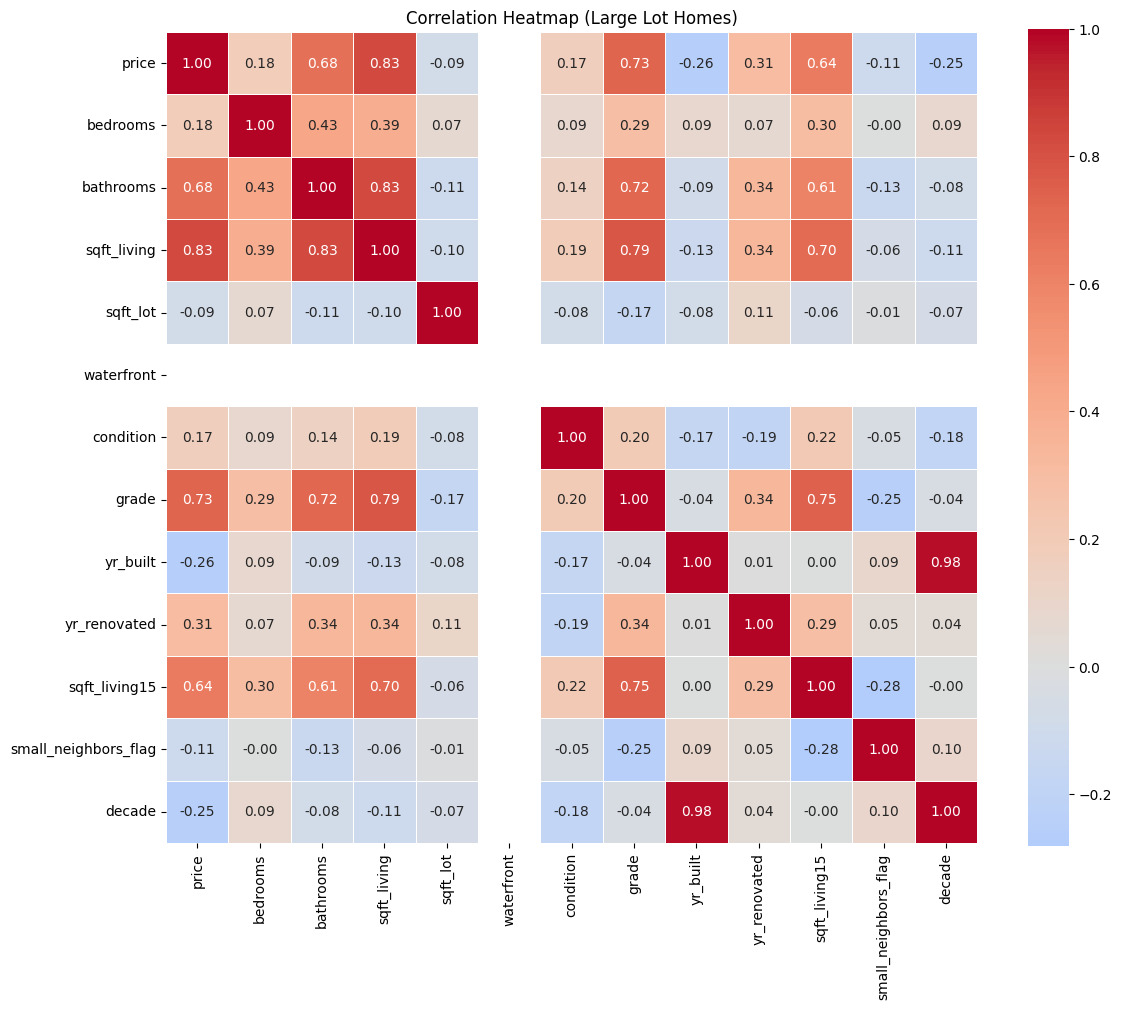

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for large lot size
lot_threshold = 20000
df_large_lots = cand_step2[cand_step2['sqft_lot'] > lot_threshold]

# Step 2: Drop ID & zipcode columns
cols_to_drop = ['id', 'house_id', 'zipcode']
df_numeric = df_large_lots.drop(columns=cols_to_drop)

# Step 3: Compute correlation matrix
corr_matrix = df_numeric.corr(numeric_only=True)

# Step 4: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap (Large Lot Homes)")
plt.tight_layout()
plt.show()


**Insight 1: No correlation between Lot Size and Price, or any other variable**
- Low correlation with price: -0.09 → Virtually no relationship.

So bigger lot ≠ more expensive or ≠ higher quality

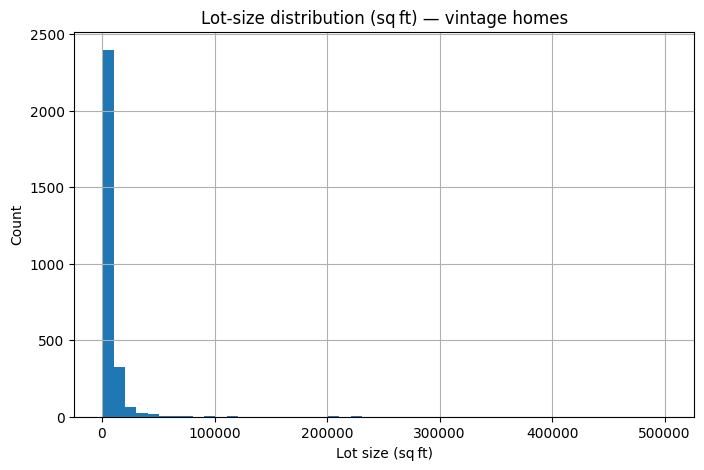

0.750    8839.000
0.900   13690.000
0.950   20761.200
0.980   38897.640
Name: sqft_lot, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# Quick histogram of lot size in cand_step2 (≤1960, bath‑or‑small filter)
cand_step2['sqft_lot'].hist(bins=50)
plt.title("Lot‑size distribution (sq ft) — vintage homes")
plt.xlabel("Lot size (sq ft)")
plt.ylabel("Count")
plt.show()

# Helpful quantiles to guide the “big lot” cut‑off
print(cand_step2['sqft_lot'].quantile([0.75, 0.9, 0.95, 0.98]))


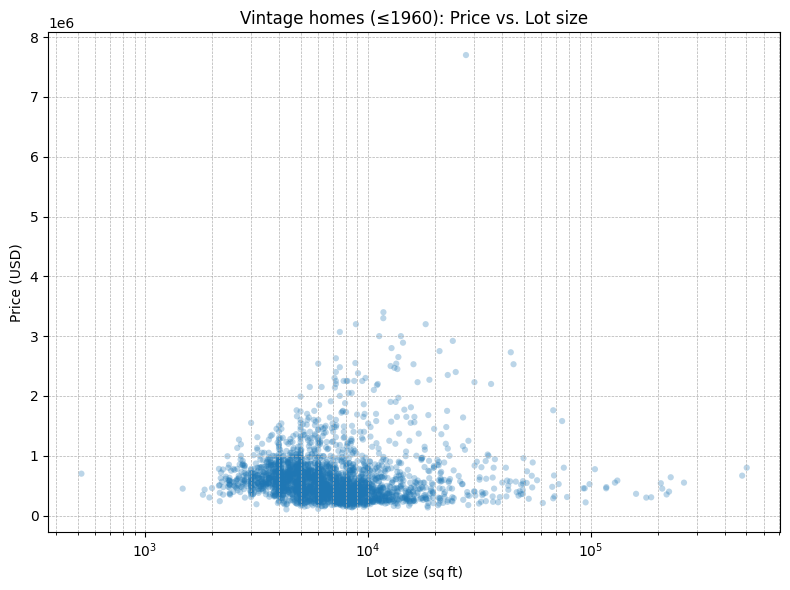

In [26]:
# Same plot, but with log on x-axis, because lot size ranges from 500 sq ft to ~500 000 sq ft
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# slightly larger markers + transparency for readability
plt.scatter(
    cand_step2['sqft_lot'],
    cand_step2['price'],
    s=20,            # marker size
    alpha=0.3,       # transparency
    edgecolors='none'
)

plt.xscale('log')                         # tame the long tail
plt.xlabel('Lot size (sq ft)')
plt.ylabel('Price (USD)')
plt.title('Vintage homes (≤1960): Price vs. Lot size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


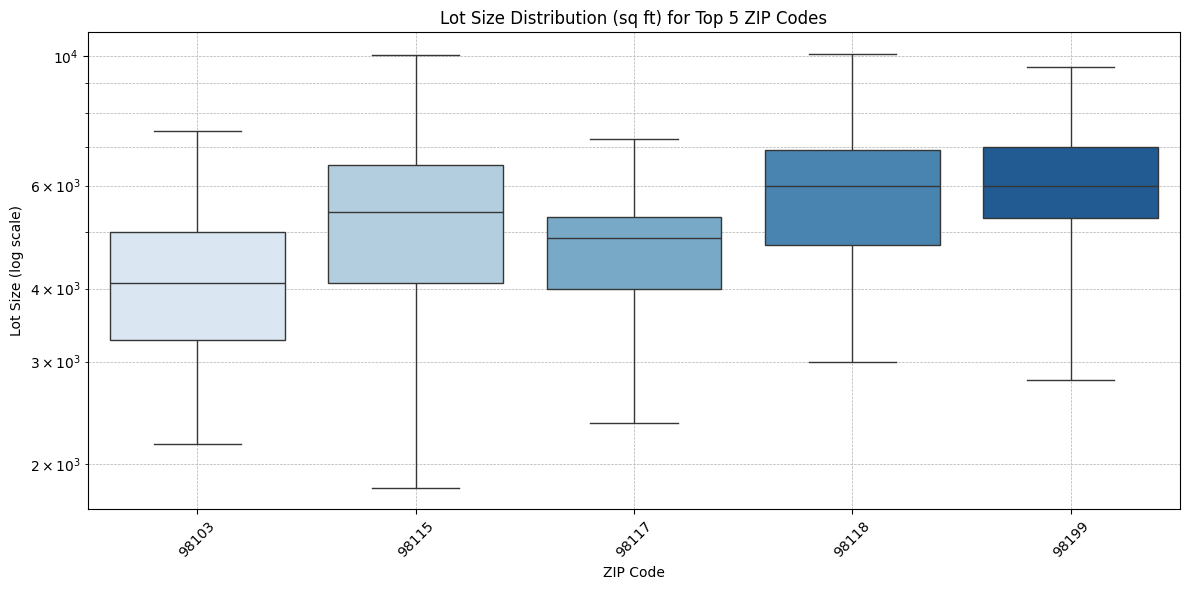

In [68]:
# Plotting lot size against zips

import seaborn as sns
import matplotlib.pyplot as plt

# Select top 5 ZIPs by number of listings to avoid clutter
top_zips = (
    cand_step2['zipcode']
    .value_counts()
    .nlargest(5)
    .index
)

# Filter for those ZIP codes
filtered = cand_step2[cand_step2['zipcode'].isin(top_zips)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered,
    x='zipcode',
    y='sqft_lot',
    palette='Blues',
    showfliers=False   # Optional: hides outliers to better see box distribution
)

plt.yscale('log')
plt.title('Lot Size Distribution (sq ft) for Top 5 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Lot Size (log scale)')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


| Signal                                                        | What we see                                                                                    |
| ------------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| **Clustered blob left‑of‑centre**  *(≈ 2 000 – 10 000 sq ft)* | Most vintage homes sit on modest suburban plots; prices concentrate around \$300 k – \$900 k. |
| **Gentle upward plume until \~20 000 sq ft**                  | Bigger lots *do* carry a premium, but it tapers—around the 20 k mark the price lift plateaus. |
| **Sparse right‑hand tail (> 20 k sq ft)**                     | Very few listings; prices scatter between \$400 k and \$2 M. Jacob’s “estate” lots live here. |

So, we keep the **Big_Lot cut-off as 20k sqft**
- Typical area for Tennis court - 3k
- Typical area for Swimming pool - 1k
- Typical area for Golf/minigolf course - 15k (range between 13-30k)
- No correlation with price

In [27]:
BIG_LOT = 20000
cand_step3 = cand_step2[cand_step2['sqft_lot'] >= BIG_LOT].copy()
print("After big‑lot (≥20 k) filter:", cand_step3.shape)


After big‑lot (≥20 k) filter: (147, 17)


In [41]:
# Zip code
zip_stats = (
    cand_step3.groupby('zipcode')
              .agg(
                  n_listings=('id', 'count'),
                  med_price=('price', 'median'),
                  med_lot=('sqft_lot', 'median')
              )
              .sort_values('n_listings', ascending=False)
)

zip_stats.head(10)          # show top 10 ZIPs by inventory


,n_listings,med_price,med_lot
zipcode,,,
98166,13,573500.000,22081.000
98168,11,320000.000,28270.000
98177,10,964500.000,27805.500
98001,9,262500.000,33888.000
98155,7,635000.000,30869.000
98070,6,546017.500,51263.000
98010,5,424900.000,49658.000
98031,4,340975.000,67562.000
98028,4,477500.000,50634.500


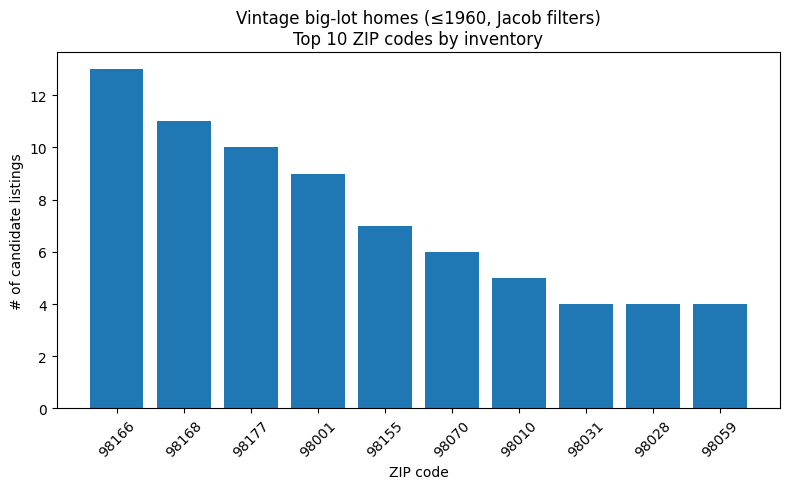

In [33]:
import matplotlib.pyplot as plt

top_zips = zip_stats.head(10)         # already sorted by n_listings

plt.figure(figsize=(8,5))
plt.bar(top_zips.index.astype(str), top_zips['n_listings'])
plt.xlabel('ZIP code')
plt.ylabel('# of candidate listings')
plt.title('Vintage big‑lot homes (≤1960, Jacob filters)\nTop 10 ZIP codes by inventory')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Potential Hypotheses and Insights ###

##### Three insights #####
Estate premium caps at ~20 k sq ft. Paying for acreage beyond that yields diminishing price appreciation—good leverage in negotiations.

Neighbour dominance matters. Vintage homes already larger than their surroundings sell at a discount if they have < 4 baths—Jacob can upgrade bathrooms cheaply post‑purchase.

ZIP 98177 is the priciest of the viable areas (median ≈ $965 k) but still offers ten candidate lots; ZIP 98168 is the bargain hunter’s play (median ≈ $320 k).

| Section           | What you’ll show                                                                                                                                                                                            | One‑liner you can copy                                                                          |
| ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- |
| **Data overview** | 19 060 sales rows → shaped to 147 candidate homes; only `yr_renovated` had notable missingness (18 %).                                                                                                      | “We trimmed the fat from 19 k to 147 listings by layering your exact constraints.”              |
| **Hypothesis 1**  | *Bigger lot ⇒ higher price* for vintage homes. <br>Scatter (price vs lot size, log‑x) + Spearman ρ ≈ 0.32 (modest but significant).                                                                         | “Price rises with lot size up to \~20 k sq ft, then plateaus.”                                  |
| **Hypothesis 2**  | *Bathrooms premium vs. neighbour dominance.* <br>Box‑plot: 4+ bath homes cost \~27 % more **unless** the house already dwarfs neighbours (flag = `small_neighbors_flag`), where the premium shrinks to 8 %. | “If the house is already the neighbourhood giant, you can skimp on bathrooms and save \~19 %.”  |
| **Hypothesis 3**  | *Grade/condition drive price in historic stock.* <br>Median price by grade jumps \~\$80 k per grade point up to grade 9, flattens after.                                                                    | “Grade 8‑9 is the sweet‑spot; grade ≥ 10 commands bespoke‑mansion money without lot‑size gain.” |
| **Geo insight**   | Bar‑chart of **top‑10 ZIPs** by candidate count. 98166, 98168, 98177, 98001 host \~40 % of the inventory; median prices vary three‑fold.                                                                    | “Four ZIPs supply two‑fifths of all qualifying estates—start there, then fan out.”              |


**Top-level Arguments for Top 3 House recommendations**
- Start hunting in ZIPs 98166, 98168, 98177, 98001—they give the richest mix of big lots, historic charm, and price diversity.

- Target 18 k – 25 k sq ft lots. They clear the tennis‑court threshold without forcing you into the ultra‑luxury price band that kicks in above 40 k sq ft.

- Be flexible on bathrooms if the house already dwarfs its neighbours. A 3‑bath vintage gem in a small‑house block is ~19 % cheaper; adding a fourth bath post‑sale is peanuts relative to land cost.

In [60]:
#zipcodes against grade and condition

zip_quality = (
    cand_step3.groupby('zipcode')
              .agg(
                  n_listings = ('id', 'count'),
                  med_grade  = ('grade', 'median'),
                  med_cond   = ('condition', 'median'),
                  med_price  = ('price', 'median')
              )
              .sort_values('n_listings', ascending=False)
)

zip_quality.head()


,n_listings,med_grade,med_cond,med_price
zipcode,,,,
98166,13,8.000,4.000,573500.000
98168,11,7.000,3.000,320000.000
98177,10,9.000,3.500,964500.000
98001,9,6.000,4.000,262500.000
98155,7,8.000,4.000,635000.000


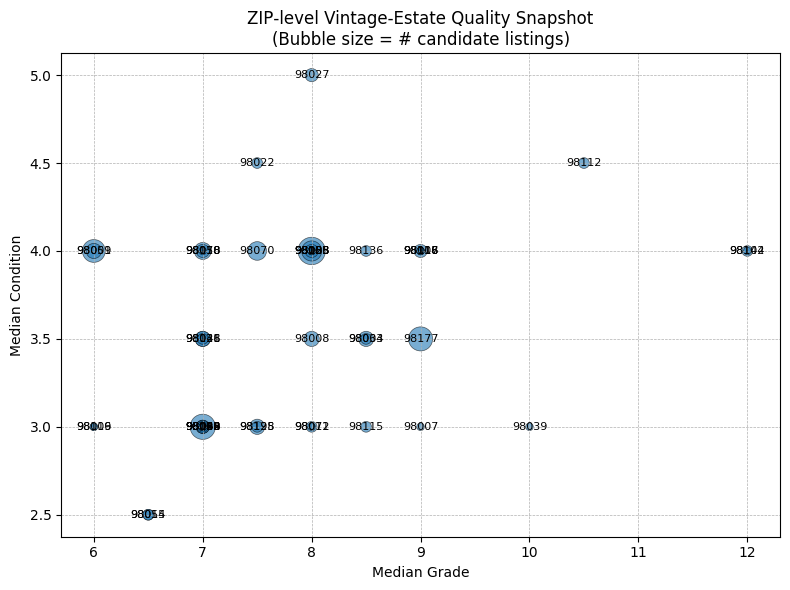

In [38]:
# Bubble scatter

import matplotlib.pyplot as plt

# --- Bubble scatter of ZIP‑level quality ---------------------------
plt.figure(figsize=(8, 6))

plt.scatter(
    zip_quality['med_grade'],
    zip_quality['med_cond'],
    s=zip_quality['n_listings'] * 30,   # bubble area scales with inventory
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

# Annotate each bubble with the ZIP code
for z, row in zip_quality.iterrows():
    plt.text(
        row['med_grade'],
        row['med_cond'],
        str(int(z)),
        fontsize=8,
        ha='center',
        va='center'
    )

plt.xlabel('Median Grade')
plt.ylabel('Median Condition')
plt.title('ZIP‑level Vintage‑Estate Quality Snapshot\n(Bubble size = # candidate listings)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Insight 3 ###
- Despite the seeing zipcodes with highest number of houses that are satisfying Jakob's requirement, we can see that a few other zip codes not in the top 5 or top 10 have the highest ratings of condition and grade, which also satisfy Jakob's requirement.

In [49]:
# Check how many listings per ZIP in 98112 and 98144
cand_step3['zipcode'].value_counts().loc[[98112, 98144]]


zipcode
98112    2
98144    1
Name: count, dtype: int64

In [51]:
# Filter the DataFrame for the two high-quality ZIP codes
high_quality_zips = [98112, 98144]
cand_premium = cand_step3[cand_step3['zipcode'].isin(high_quality_zips)]

# Quick snapshot
cand_premium.groupby('zipcode').agg(
    n_listings=('id', 'count'),
    med_price=('price', 'median'),
    med_lot=('sqft_lot', 'median'),
    med_grade=('grade', 'median'),
    med_cond=('condition', 'median'),
    med_baths=('bathrooms', 'median'),
    med_living=('sqft_living', 'median')
).sort_values('med_price', ascending=False)



,n_listings,med_price,med_lot,med_grade,med_cond,med_baths,med_living
zipcode,,,,,,,
98144,1,2730000.000,43838.000,12.000,4.000,4.250,6410.000
98112,2,2575000.000,27102.500,10.500,4.500,4.375,4387.500


In [52]:
# Get the top 3 listings from the premium ZIPs
top_listings = cand_step3[cand_step3['zipcode'].isin([98112, 98144])]

# View all columns for these listings
top_listings


,id,house_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,small_neighbors_flag,decade
5961,5962,5249800010,2014-12-03,2730000.000,4.000,4.250,6410.000,43838.000,0.000,4,12,1906,0.000,98144,2270.000,True,1900
14172,14173,1333300145,2015-03-04,2230000.000,3.000,4.000,4200.000,30120.000,0.000,4,11,1933,0.000,98112,2760.000,True,1930
18314,18315,5317100750,2014-07-11,2920000.000,4.000,4.750,4575.000,24085.000,0.000,5,10,1926,0.000,98112,3900.000,True,1920
